## Imports

In [26]:
import xlwings as xw
from xlwings import constants
import pandas as pd
import random
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
# test line from Gitfrom datetime import date,timedelta

## Plan

1) For each company:  
- capital_in = fund_size / # of companies (we'll deal with reserves in 2.0)  
-  capital_out = lognormal(1,1.075,100_000)  
- date_in = triangle(inv_period_start,median,inv_period_end)  
- date_out = normal(avg_hold_period,STD?)    

2) output ~> workbook to capture cash flows for each

3) workbook calculates Portfolio MOIC and Portfolio IRR  

4) plots from dataframe ~> Excel  

###  Returns Distribution Parameters

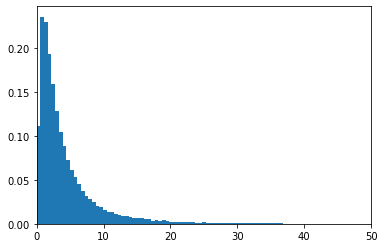

In [52]:
returns_mean = 1.0
returns_STD = 1.0
returns_sims = 100_000

plt.hist(np.random.lognormal(returns_mean,returns_STD,returns_sims),
        bins = 500,
        density = True,
        align = 'mid')
plt.xlim(0,50)
plt.show()

### Investment Period Distribution Parameters

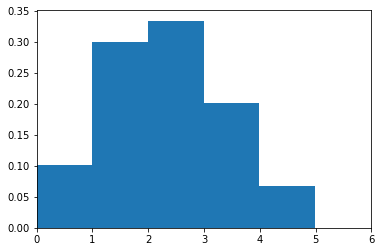

In [55]:
inv_period_lower_bound = 0
inv_period_mode = 2.0
inv_period_upper_bound = 5
inv_period_sims = 100_000
inv_period_bins = inv_period_upper_bound

plt.hist(np.random.triangular(inv_period_lower_bound,inv_period_mode,inv_period_upper_bound,inv_period_sims),
        bins = inv_period_bins,
        density = True,
        align = 'mid')
plt.xlim(0,6)
plt.show()

### Hold Period Distribution Parameters

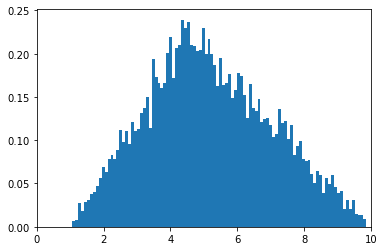

In [46]:
hold_period_sims = 10_000
hold_period_mean= 4.5

#Normal Distribution parameters

# hold_period_STD = 2.0
# plt.hist(np.random.normal(hold_period_mean,hold_period_STD,hold_period_sims),
#         bins = 1_000,
#         density = True,
#         align = 'mid')
# plt.xlim(0,upper_bound)
# plt.show()

#Triangular Distribution
hold_period_lower_bound = 1
hold_period_mode = hold_period_mean
hold_period_upper_bound = 10

hold_period_normal_dist = np.random.triangular(hold_period_lower_bound,hold_period_mode,hold_period_upper_bound,hold_period_sims)

plt.hist(hold_period_normal_dist,
        bins = 100,
        density = True,
        align = 'mid')
plt.xlim(0,hold_period_upper_bound)
plt.show()

#### Connect workbook

In [30]:
book = xw.Book('/Users/randycastleman/Dropbox/Code/Monte_Carlo/portfolio_monte_carlo.xlsx')

In [31]:
model = book.sheets("Model")

In [32]:
results = book.sheets("Results")

### Fund Inputs

In [57]:
fund_size = 100
model.range("C2").value = fund_size

num_companies = 10
model.range("C3").value = num_companies

avg_initial_investment = fund_size / num_companies

reserve_ratio = 1.0
model.range("C4").value = reserve_ratio

inv_period_begin_date = date(2022,1,1)
days = 365

#capital in
company1_capital_in = avg_initial_investment
model.range("C16").value = -company1_capital_in

company2_capital_in = avg_initial_investment
model.range("C17").value = -company2_capital_in

#determine capital out
company1_capital_out = company1_capital_in * np.random.lognormal(returns_mean,returns_STD)
model.range("D16").value = company1_capital_out

company2_capital_out = company2_capital_in * np.random.lognormal(returns_mean,returns_STD)
model.range("D17").value = company2_capital_out

#determine investment date
# entry_offset = timedelta(days = np.random.triangular(inv_period_lower_bound*days,
#                                                      inv_period_mode*days,
#                                                      inv_period_upper_bound*days))

company1_inv_date = inv_period_begin_date + timedelta(days = np.random.triangular(inv_period_lower_bound*days,
                                                     inv_period_mode*days,
                                                     inv_period_upper_bound*days))
model.range("E16").value = company1_inv_date

company2_inv_date = inv_period_begin_date + timedelta(days = np.random.triangular(inv_period_lower_bound*days,
                                                     inv_period_mode*days,
                                                     inv_period_upper_bound*days))
model.range("E17").value = company2_inv_date

#determine exit date
# exit_offset = timedelta(days = np.random.triangular(hold_period_lower_bound*days,
#                                                     hold_period_mode*days,
#                                                     hold_period_upper_bound*days))

company1_exit_date = company1_inv_date + timedelta(days = np.random.triangular(hold_period_lower_bound*days,
                                                    hold_period_mode*days,
                                                    hold_period_upper_bound*days))
model.range("F16").value = company1_exit_date

company2_exit_date = company1_inv_date + timedelta(days = np.random.triangular(hold_period_lower_bound*days,
                                                    hold_period_mode*days,
                                                    hold_period_upper_bound*days))
model.range("F17").value = company2_exit_date

########## 
#get portfolio output
portfolio_MOIC = model.range("C28").value
portfolio_IRR = model.range("C29").value

# print("Inv Period Begin Date = ",inv_period_begin_date)
# print("Company 1 Capital In = ",company1_capital_in)
# print("Company 1 Exit Proceeds = ",company1_capital_out)
# print("Entry Offset = ",entry_offset)
# print ("Company 1 Investment Date = ", company1_inv_date)
# print("Exit Offset = ",exit_offset)
# print("Company 1 Exit Date = ",company1_exit_date)
print("Portfolio MOIC = ",portfolio_MOIC)
print("Portfolio IRR = ",portfolio_IRR)

Portfolio MOIC =  3.1327037322419193
Portfolio IRR =  0.358372050523758
